## Laboratorio #2 Redes neuronales
##### Jose Guerra: 20053
##### Pablo Gonzalez: 20362

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [2]:
data = pd.read_csv('data/movie_statistic_dataset.csv')
data.dtypes


movie_title              object
production_date          object
genres                   object
runtime_minutes         float64
director_name            object
director_professions     object
director_birthYear       object
director_deathYear       object
movie_averageRating     float64
movie_numerOfVotes      float64
approval_Index          float64
Production budget $       int64
Domestic gross $          int64
Worldwide gross $         int64
dtype: object

Eliminacion de nulos

In [3]:
data = data.replace(r'-|\n', '', regex=True)
data.dropna(inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           4380 non-null   object 
 1   production_date       4380 non-null   object 
 2   genres                4380 non-null   object 
 3   runtime_minutes       4380 non-null   float64
 4   director_name         4380 non-null   object 
 5   director_professions  4380 non-null   object 
 6   director_birthYear    4380 non-null   object 
 7   director_deathYear    4380 non-null   object 
 8   movie_averageRating   4380 non-null   float64
 9   movie_numerOfVotes    4380 non-null   float64
 10  approval_Index        4380 non-null   float64
 11  Production budget $   4380 non-null   int64  
 12  Domestic gross $      4380 non-null   int64  
 13  Worldwide gross $     4380 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 479.2+ KB


In [5]:
data.shape

(4380, 14)

In [6]:
pd.set_option('display.width',100)
pd.set_option('display.precision',3)
data.describe()

# Como se puede visualizar los datos no presentan una varianza alta por lo que esto es bueno para el modelo


,runtime_minutes,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
count,4380.000,4380.000,4.380e+03,4380.000,4.380e+03,4.380e+03,4.380e+03
mean,109.786,6.407,1.370e+05,5.033,3.869e+07,5.256e+07,1.149e+08
std,20.376,1.024,2.151e+05,1.385,4.574e+07,7.509e+07,2.007e+08
min,63.000,1.500,5.000e+00,0.395,5.000e+04,2.640e+02,4.230e+02
25%,96.000,5.800,2.141e+04,4.178,1.000e+07,8.866e+06,1.299e+07
50%,106.000,6.500,6.498e+04,5.039,2.300e+07,2.832e+07,4.448e+07
75%,120.000,7.100,1.599e+05,5.944,5.000e+07,6.410e+07,1.280e+08
max,271.000,9.300,2.696e+06,10.000,4.600e+08,8.584e+08,2.924e+09


C:\Users\pablo\AppData\Local\Temp\ipykernel_14004\1090781252.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["runtime_minutes"], ax = axes[0,0])
C:\Users\pablo\AppData\Local\Temp\ipykernel_14004\1090781252.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["movie_averageRating"], 

<AxesSubplot: xlabel='Worldwide gross $', ylabel='Density'>

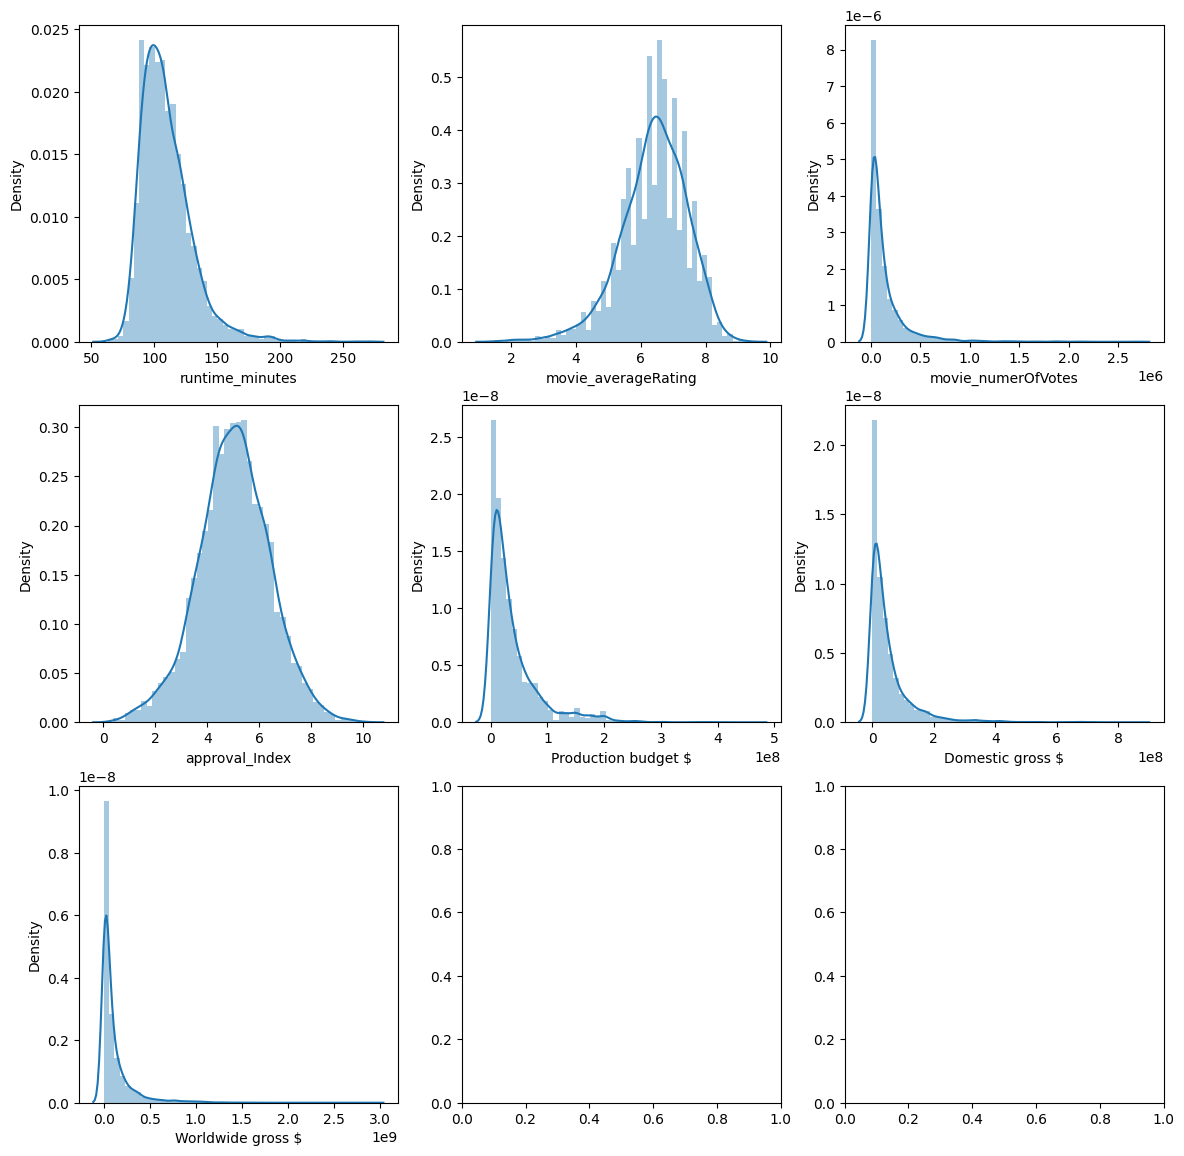

In [7]:
import seaborn as sns
f, axes = plt.subplots(3,3,figsize =(14,14))
sns.distplot(data["runtime_minutes"], ax = axes[0,0])
sns.distplot(data["movie_averageRating"], ax = axes[0,1])
sns.distplot(data["movie_numerOfVotes"], ax = axes[0,2])
sns.distplot(data["approval_Index"], ax = axes[1,0])
sns.distplot(data["Production budget $"], ax = axes[1,1])
sns.distplot(data["Domestic gross $"], ax = axes[1,2])
sns.distplot(data["Worldwide gross $"], ax = axes[2,0])



In [8]:

# Variables categoricas
variables_categoricas = ['movie_title', "production_date" ,'genres', 'director_name', 'director_professions']

for variable in variables_categoricas:
    grupos = data.groupby(variable)['movie_averageRating'].apply(list)
    resultado_anova = stats.f_oneway(*grupos)
    valor_p = resultado_anova.pvalue
    
    print(f"\nTest de ANOVA para la variable '{variable}':")
    
    print(f"Valor p: {valor_p}")
    nivel_significancia = 0.05
    if valor_p < nivel_significancia:
        print("Hay diferencias significativas entre los grupos.")
    else:
        print("No se encontraron diferencias significativas entre los grupos.")



Test de ANOVA para la variable 'movie_title':
Valor p: 0.93254708020081
No se encontraron diferencias significativas entre los grupos.

Test de ANOVA para la variable 'production_date':
Valor p: 0.11766106146028266
No se encontraron diferencias significativas entre los grupos.

Test de ANOVA para la variable 'genres':
Valor p: 7.538428814184124e-115
Hay diferencias significativas entre los grupos.

Test de ANOVA para la variable 'director_name':
Valor p: 3.288534028568514e-89
Hay diferencias significativas entre los grupos.

Test de ANOVA para la variable 'director_professions':
Valor p: 7.64457114560171e-16
Hay diferencias significativas entre los grupos.


In [9]:
valores_nulos = data.isnull()

# Utiliza sum() para contar los valores True en cada columna, que representa la cantidad de nulos en cada columna
cantidad_nulos_por_columna = valores_nulos.sum()

# Para obtener la cantidad total de valores nulos en el DataFrame, puedes sumar los valores de cantidad_nulos_por_columna
cantidad_total_nulos = cantidad_nulos_por_columna.sum()

# Muestra la cantidad de nulos por columna y la cantidad total de nulos
print("Cantidad de nulos por columna:")
print(cantidad_nulos_por_columna)

print("\nCantidad total de nulos en el DataFrame:", cantidad_total_nulos)

Cantidad de nulos por columna:
movie_title             0
production_date         0
genres                  0
runtime_minutes         0
director_name           0
director_professions    0
director_birthYear      0
director_deathYear      0
movie_averageRating     0
movie_numerOfVotes      0
approval_Index          0
Production budget $     0
Domestic gross $        0
Worldwide gross $       0
dtype: int64

Cantidad total de nulos en el DataFrame: 0


C:\Users\pablo\AppData\Local\Temp\ipykernel_14004\2921579763.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


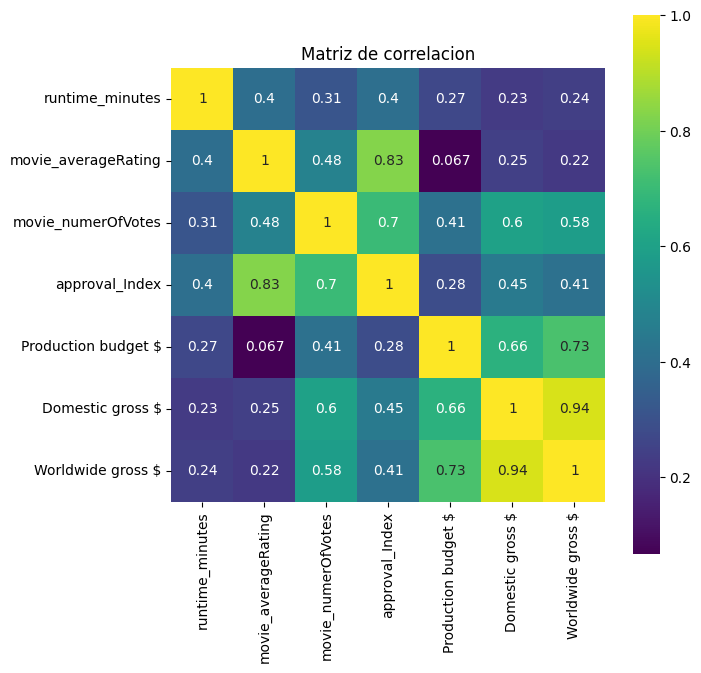

In [10]:
correlation = data.corr()
plt.figure(figsize=(7,7))
ax = sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Matriz de correlacion")
plt.show()

In [11]:
X = data[['approval_Index','movie_numerOfVotes','runtime_minutes','Worldwide gross $']]
y = data[['movie_averageRating']]
X = np.asarray(X)
y = np.asarray(y)


In [12]:
y

array([[7.8],
       [8.4],
       [6.6],
       ...,
       [4.9],
       [6.2],
       [6.2]])

In [13]:
from sklearn.model_selection import train_test_split
#X = X.astype(float)
y = y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
y_train

array([[6.3],
       [6.2],
       [7.1],
       ...,
       [7.5],
       [7. ],
       [6.6]])

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

## Primer modelo

In [17]:
from keras.layers import Dropout
from keras.regularizers import l2
batched_model = Sequential([
    Dense(64, input_shape=(4,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='linear')
]);


In [18]:
batched_model.compile(
    optimizer='adam', 
    loss='mean_squared_error', 
    metrics=['mean_absolute_error']
)

In [19]:
batched_history =  batched_model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_split=0.25, 
    batch_size=32,
    verbose=2 
)

Epoch 1/100
83/83 - 2s - loss: 35.2000 - mean_absolute_error: 5.8631 - val_loss: 27.0095 - val_mean_absolute_error: 5.1124 - 2s/epoch - 28ms/step
Epoch 2/100
83/83 - 0s - loss: 17.4604 - mean_absolute_error: 4.0645 - val_loss: 8.4913 - val_mean_absolute_error: 2.7953 - 155ms/epoch - 2ms/step
Epoch 3/100
83/83 - 0s - loss: 3.6302 - mean_absolute_error: 1.6912 - val_loss: 1.0094 - val_mean_absolute_error: 0.8458 - 158ms/epoch - 2ms/step
Epoch 4/100
83/83 - 0s - loss: 0.4853 - mean_absolute_error: 0.5164 - val_loss: 0.5070 - val_mean_absolute_error: 0.5512 - 157ms/epoch - 2ms/step
Epoch 5/100
83/83 - 0s - loss: 0.3792 - mean_absolute_error: 0.4281 - val_loss: 0.4886 - val_mean_absolute_error: 0.5310 - 158ms/epoch - 2ms/step
Epoch 6/100
83/83 - 0s - loss: 0.3305 - mean_absolute_error: 0.4102 - val_loss: 0.3154 - val_mean_absolute_error: 0.3570 - 158ms/epoch - 2ms/step
Epoch 7/100
83/83 - 0s - loss: 0.2578 - mean_absolute_error: 0.3556 - val_loss: 0.2643 - val_mean_absolute_error: 0.3232 - 

In [20]:

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

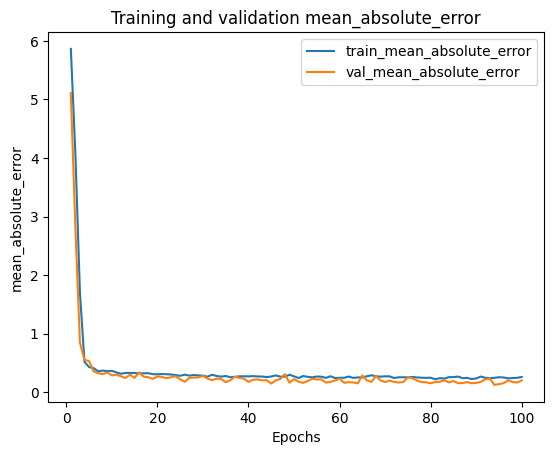

In [21]:
plot_metric(batched_history, "mean_absolute_error")


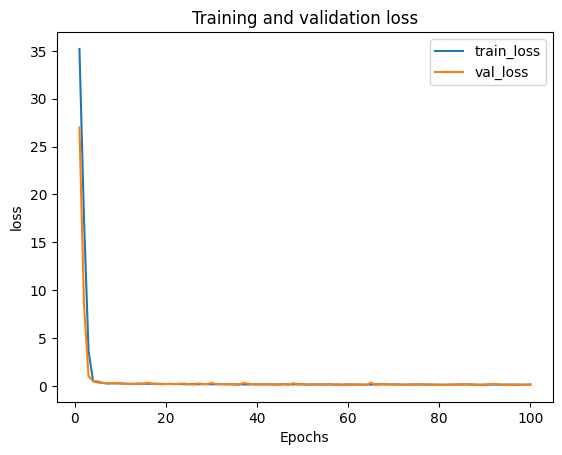

In [22]:
plot_metric(batched_history, 'loss')

In [23]:
batched_model.evaluate(X_train, y_train, verbose=2)

y_train

110/110 - 0s - loss: 0.1087 - mean_absolute_error: 0.1957 - 95ms/epoch - 859us/step


array([[6.3],
       [6.2],
       [7.1],
       ...,
       [7.5],
       [7. ],
       [6.6]])

In [24]:
y_hat = batched_model.predict(X_train)
y_hat

110/110 [==============================] - 0s 856us/step


array([[6.491476 ],
       [6.1194444],
       [6.9812503],
       ...,
       [7.4222646],
       [6.874322 ],
       [6.537255 ]], dtype=float32)

In [25]:
y_train

array([[6.3],
       [6.2],
       [7.1],
       ...,
       [7.5],
       [7. ],
       [6.6]])

## Segundo modelo

In [26]:
from keras.layers import Dropout
from keras.regularizers import l2
batched_model2 = Sequential([
    Dense(64, input_shape=(4,), activation="tanh"),
    BatchNormalization(),
    Dense(128, activation='tanh'),
    BatchNormalization(),
    Dense(64, activation='tanh'),
    BatchNormalization(),
    Dense(1, activation='linear')
]);


In [27]:
batched_model2.compile(
    optimizer='adam', 
    loss='mean_squared_error', 
    metrics=['mean_absolute_error']
)

In [28]:
batched_history2 =  batched_model2.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_split=0.25, 
    batch_size=32,
    verbose=2 
)

Epoch 1/100
83/83 - 2s - loss: 35.4445 - mean_absolute_error: 5.9050 - val_loss: 36.7494 - val_mean_absolute_error: 6.0047 - 2s/epoch - 19ms/step
Epoch 2/100
83/83 - 0s - loss: 18.5166 - mean_absolute_error: 4.2155 - val_loss: 13.3559 - val_mean_absolute_error: 3.5836 - 130ms/epoch - 2ms/step
Epoch 3/100
83/83 - 0s - loss: 4.1131 - mean_absolute_error: 1.8311 - val_loss: 2.4063 - val_mean_absolute_error: 1.3871 - 148ms/epoch - 2ms/step
Epoch 4/100
83/83 - 0s - loss: 0.5270 - mean_absolute_error: 0.5556 - val_loss: 0.4734 - val_mean_absolute_error: 0.5233 - 168ms/epoch - 2ms/step
Epoch 5/100
83/83 - 0s - loss: 0.3353 - mean_absolute_error: 0.4176 - val_loss: 0.3413 - val_mean_absolute_error: 0.3696 - 160ms/epoch - 2ms/step
Epoch 6/100
83/83 - 0s - loss: 0.3209 - mean_absolute_error: 0.4067 - val_loss: 0.3559 - val_mean_absolute_error: 0.4330 - 156ms/epoch - 2ms/step
Epoch 7/100
83/83 - 0s - loss: 0.2736 - mean_absolute_error: 0.3757 - val_loss: 0.2488 - val_mean_absolute_error: 0.3005 -

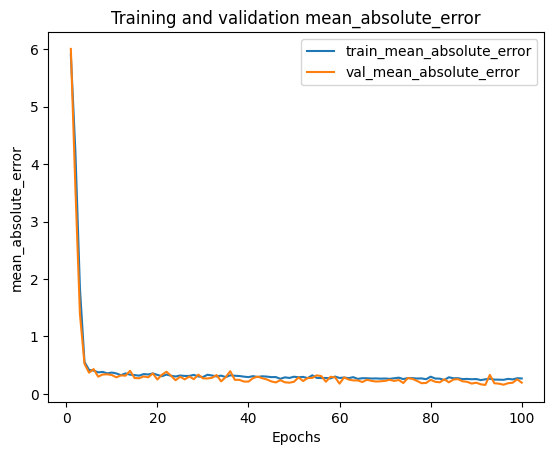

In [29]:
plot_metric(batched_history2, "mean_absolute_error")

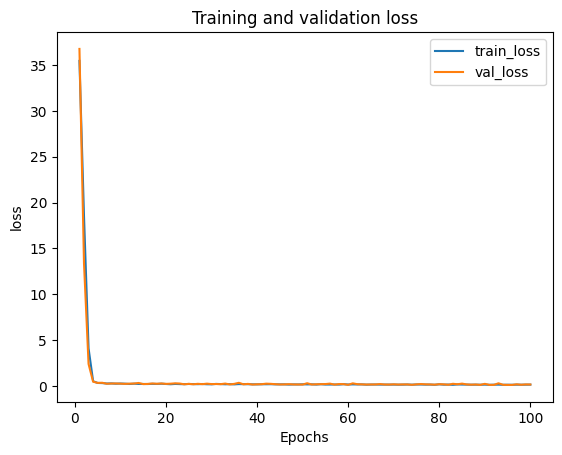

In [30]:
plot_metric(batched_history2, 'loss')

In [31]:
batched_model2.evaluate(X_train, y_train, verbose=2)

y_train

110/110 - 0s - loss: 0.1270 - mean_absolute_error: 0.1809 - 86ms/epoch - 784us/step


array([[6.3],
       [6.2],
       [7.1],
       ...,
       [7.5],
       [7. ],
       [6.6]])

In [32]:
y_hat2 = batched_model2.predict(X_train)
y_hat2

110/110 [==============================] - 0s 643us/step


array([[5.8869815],
       [6.2543564],
       [7.2246366],
       ...,
       [7.556335 ],
       [7.0765576],
       [6.4685063]], dtype=float32)

### Tercer modelo

In [33]:
from keras.layers import Dropout
from keras.regularizers import l2
batched_model3= Sequential([
    Dense(64, input_shape=(4,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='linear')
])

In [34]:
batched_model3.compile(
    optimizer='adam', 
    loss='mean_squared_error', 
    metrics=['mean_absolute_error']
)

In [35]:
batched_history3 =  batched_model3.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_split=0.25, 
    batch_size=32,
    verbose=2 
)

Epoch 1/100
83/83 - 3s - loss: 37.3341 - mean_absolute_error: 6.0612 - val_loss: 29.6534 - val_mean_absolute_error: 5.3750 - 3s/epoch - 32ms/step
Epoch 2/100
83/83 - 0s - loss: 25.0204 - mean_absolute_error: 4.9382 - val_loss: 18.2035 - val_mean_absolute_error: 4.2075 - 188ms/epoch - 2ms/step
Epoch 3/100
83/83 - 0s - loss: 10.8807 - mean_absolute_error: 3.1974 - val_loss: 7.4032 - val_mean_absolute_error: 2.6491 - 198ms/epoch - 2ms/step
Epoch 4/100
83/83 - 0s - loss: 2.6278 - mean_absolute_error: 1.4870 - val_loss: 1.5783 - val_mean_absolute_error: 1.1208 - 200ms/epoch - 2ms/step
Epoch 5/100
83/83 - 0s - loss: 0.5439 - mean_absolute_error: 0.5682 - val_loss: 0.6145 - val_mean_absolute_error: 0.5627 - 201ms/epoch - 2ms/step
Epoch 6/100
83/83 - 0s - loss: 0.3105 - mean_absolute_error: 0.3915 - val_loss: 0.4055 - val_mean_absolute_error: 0.4240 - 227ms/epoch - 3ms/step
Epoch 7/100
83/83 - 0s - loss: 0.2746 - mean_absolute_error: 0.3641 - val_loss: 0.3492 - val_mean_absolute_error: 0.3563 

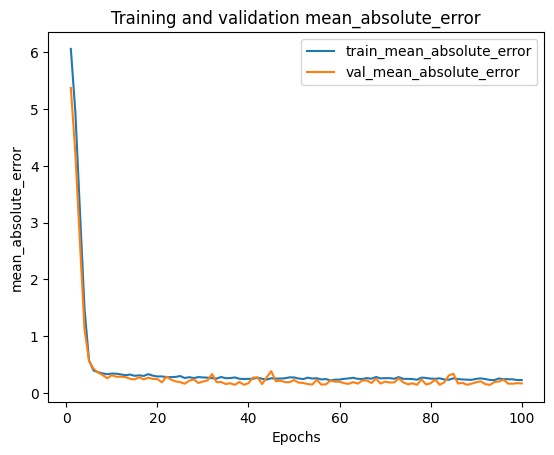

In [36]:
plot_metric(batched_history3, "mean_absolute_error")

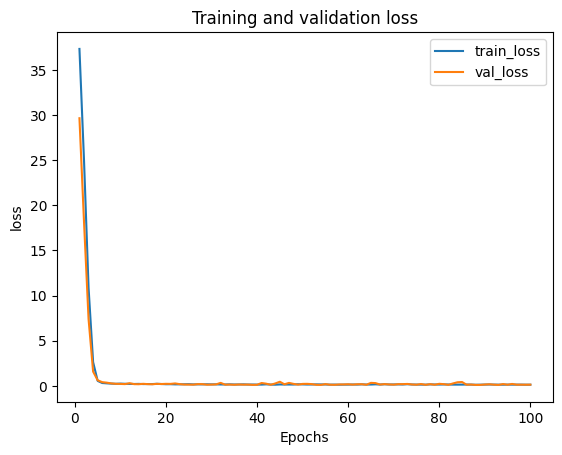

In [37]:
plot_metric(batched_history3, 'loss')

In [38]:
batched_model3.evaluate(X_train, y_train, verbose=2)

y_train

110/110 - 0s - loss: 0.0961 - mean_absolute_error: 0.1553 - 106ms/epoch - 963us/step


array([[6.3],
       [6.2],
       [7.1],
       ...,
       [7.5],
       [7. ],
       [6.6]])

In [39]:
y_hat2 = batched_model2.predict(X_train)
y_hat2

110/110 [==============================] - 0s 655us/step


array([[5.8869815],
       [6.2543564],
       [7.2246366],
       ...,
       [7.556335 ],
       [7.0765576],
       [6.4685063]], dtype=float32)